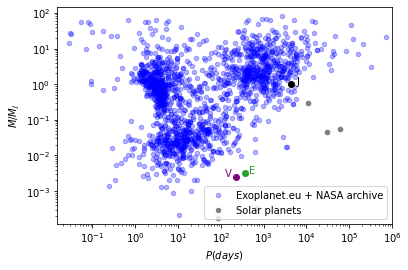

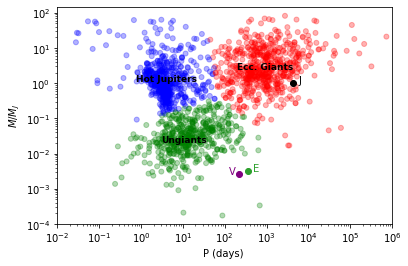

In [307]:
%run read+groups.ipynb

We first aim to find three separate groups:
* Hot jupiters: P $\lesssim 7$ d, $M/M_J \leq 12$; centered around $\sim 1 M_J$ and $P \sim 3$ d; 
* Eccentric giants: $10^2 d \lesssim P \lesssim 10^4 d$; $1 \lesssim M/M_J \leq 10$.
* Ungiants: $P \leq 100 d$; $ M/M_J \lesssim 0.07$ and $R \lesssim 0.35 R_J$

$\rightarrow$ <u>Task 1:</u>  mass vs period.

In [314]:
len(d_MP_US) #US data with M and P values

1479

In [293]:
def label(data):
    e_gts_M = data.loc[data.obj_phys_mass_mjup>=0.5]
    hotjups_M = data.loc[data.obj_phys_mass_mjup>=0.5]
    ungts_M = data.loc[data.obj_phys_mass_mjup<=0.07]

    e_gts_P = data.loc[data.obj_orb_period_day>=100]
    hotjups_P = data.loc[data.obj_orb_period_day<=7]
    ungts_P = data.loc[data.obj_orb_period_day<=400]
    
    ungts = ungts_P.loc[ungts_P.index.intersection(ungts_M.index)]
    hotjups = hotjups_P.loc[hotjups_P.index.intersection(hotjups_M.index)]
    e_gts = e_gts_P.loc[e_gts_P.index.intersection(e_gts_M.index)]
    
    ungts['number'] = np.zeros(len(ungts),int)
    hotjups['number'] = np.ones(len(hotjups),int)
    e_gts['number'] = 2*np.ones(len(e_gts),int)
    
    data = pd.concat ([hotjups, ungts, e_gts])
    
    group_names = ['Ungiants','Hot Jupiters','Ecc. Giants']
    label_names = []
    for l in np.array(data.number):
        label_names = np.append(label_names, group_names[l])
    data['label'] = label_names
    return data                        

In [315]:
hand_labeled_US = label(d_MP_US)
M_labeled, P_labeled = hand_labeled_US['obj_phys_mass_mjup'], hand_labeled_US['obj_orb_period_day']
print(len(hand_labeled_US))

1155


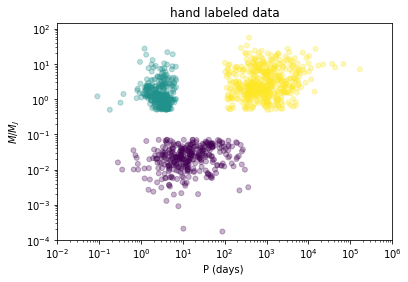

In [308]:
#hand labeled data
plt.scatter(P_labeled,M_labeled,c=hand_labeled_US.number,s=25,alpha=0.3)
plt.xlabel('P (days) ')
plt.ylabel(r'$M/M_J$ ')
plt.yscale('log')
plt.xscale('log')
plt.ylim(10e-5,15e1)
plt.title("hand labeled data")
plt.xlim(10e-3,10e5)
plt.savefig("groups.pdf",dpi=1000,transparent=True)
plt.show()

In [309]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300, tol=0.0001).fit(np.log(d_MP_US))
centroids, k_labels = kmeans.cluster_centers_, kmeans.labels_

In [310]:
label_names, group_names = [], ['Ecc. Giants','Hot Jupiters','Ungiants']
for l in k_labels:
    label_names = np.append(label_names, group_names[l])

data_clustered = d_MP_US
data_clustered['label'] = label_names

In [311]:
def mislabeled(clustered,labeled):
    for i in range(3):
        labeled = hand_labeled_US.loc[hand_labeled_US.label==group_names[i]]
        clustered = data_clustered.loc[data_clustered.label==group_names[i]]
        print(group_names[i])
        print("Labeled planets:",len(labeled),"Found through clustering:",len(clustered))
        print("Labeled items not found in cluster:",len(labeled.loc[labeled.index.difference(clustered.index)]))
        print("Found through clustering, outside of the range established:",len(clustered.loc[clustered.index.difference(labeled.index)]))

In [312]:
mislabeled(data_clustered,hand_labeled_US)

Ecc. Giants
Labeled planets: 480 Found through clustering: 550
Labeled items not found in cluster: 0
Found through clustering, outside of the range established: 70
Hot Jupiters
Labeled planets: 325 Found through clustering: 507
Labeled items not found in cluster: 0
Found through clustering, outside of the range established: 182
Ungiants
Labeled planets: 350 Found through clustering: 422
Labeled items not found in cluster: 0
Found through clustering, outside of the range established: 72
